## Observations and Insights 

1. Judging from the box plots figured below observing 4 of the treatments, Capomulin and Ramicane seem to be the two most effective treatments out of the four observed with Infubinol and Ceftamin observing much higher final tumor volumes than Capomulin and Ramicane. This is comfirmed by observing the mean tumor volumes for all treatments in which Capomulin (40.68g) and Ramicane (40.22g) are the only treatments that have mean tumor volumes below 50 grams.

2. The correlation between Weight (g) and Avg Tumor Volume (mm3) for the Capomulin regimen is: 0.84. This indicates a relatively strong positive correlation between the two, showing that the higher the weight of the mouse, the higher the avg tumor volume is for that mouse. This indicates that the higher the weight of the mouse, the less effective the treatment may be, shown by the scatter plot below.

3. Of the 4 treatments specifically observed, only one of them (Infubinol) had a potential outlier. This indicates that the other three drug regimens have normal observations of tumor volumes and can be safely compared, while the Infubinol treatment may be approached with caution.

4. It would also be interesting to see if Treatment type and effect on Tumor Volume has a different outcome based on gender of the mice, considering the distribution of male vs female mice is relatively even.

In [53]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata,study_results,how='outer',on= 'Mouse ID')

# Display the data table for preview
combined_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [54]:
# Checking the number of mice.
combined_data['Mouse ID'].nunique()

249

In [55]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_data['Duplicate'] = combined_data.duplicated(subset=['Mouse ID','Timepoint'])

duplicate_df = combined_data.loc[combined_data['Duplicate'] == True]
duplicate_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate
909,g989,Propriva,Female,21,26,0,45.000000,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [56]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate
909,g989,Propriva,Female,21,26,0,45.000000,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [57]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_list = list(duplicate_df['Mouse ID'].unique())

combined_data = combined_data.loc[~combined_data['Mouse ID'].isin(duplicate_list)]
combined_data = combined_data.reset_index(drop=True)
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,False
1876,z969,Naftisol,Male,9,30,30,65.841013,3,False
1877,z969,Naftisol,Male,9,30,35,69.176246,4,False
1878,z969,Naftisol,Male,9,30,40,70.314904,4,False


In [58]:
# Checking the number of mice in the clean DataFrame.
combined_data['Mouse ID'].nunique()

248

## Summary Statistics

In [59]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_regimen_group = combined_data[['Drug Regimen','Tumor Volume (mm3)']].groupby(['Drug Regimen'])

mean = drug_regimen_group['Tumor Volume (mm3)'].mean()
median = drug_regimen_group['Tumor Volume (mm3)'].median()
var = drug_regimen_group['Tumor Volume (mm3)'].var()
std = drug_regimen_group['Tumor Volume (mm3)'].std()
sem = drug_regimen_group['Tumor Volume (mm3)'].sem()

summary_table = pd.DataFrame({
    "mean": mean,  
    "median": median,  
    "var": var,  
    "std": std,  
    "sem": sem 
})

summary_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [60]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_regimen_agg_group = combined_data[['Drug Regimen','Tumor Volume (mm3)']].groupby(['Drug Regimen']).agg(['mean','median','var','std','sem'])
drug_regimen_agg_group


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [61]:
# Bring in a grouped by Drug Regimen table here
viz_data = combined_data.groupby(["Drug Regimen"])
viz_data.head(1)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate
0,k403,Ramicane,Male,21,16,0,45.0,0,False
10,s185,Capomulin,Female,3,17,0,45.0,0,False
454,a203,Infubinol,Female,20,23,0,45.0,0,False
474,a262,Placebo,Female,17,29,0,45.0,0,False
484,a275,Ceftamin,Female,20,28,0,45.0,0,False
494,a366,Stelasyn,Female,16,29,0,45.0,0,False
501,a401,Zoniferol,Female,8,25,0,45.0,0,False
511,a457,Ketapril,Female,11,30,0,45.0,0,False
541,a699,Propriva,Female,5,28,0,45.0,0,False
558,a818,Naftisol,Female,12,28,0,45.0,0,False


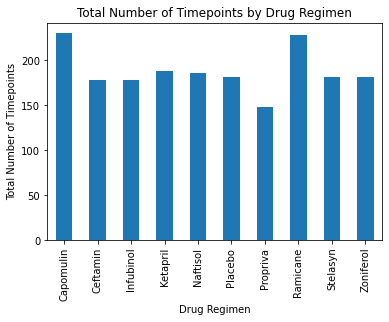

In [62]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_regimen_count = viz_data['Drug Regimen'].count()

chart = drug_regimen_count.plot(kind='bar', title='Total Number of Timepoints by Drug Regimen')
chart = chart.set_ylabel('Total Number of Timepoints')

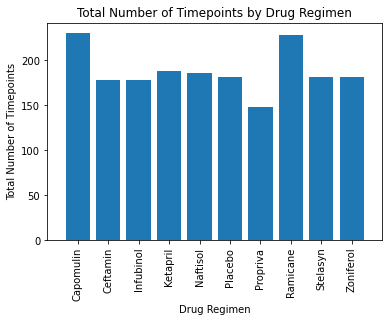

In [63]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Set the x_axis
x_axis = np.arange(len(viz_data['Drug Regimen']))

# Create the ticks for our bar chart's x axis and change labels\
tick_locations = [value for value in x_axis]
x_labels = [i[0] for i in viz_data['Drug Regimen'].unique()]
plt.xticks(tick_locations, x_labels,rotation = 90)

# Set the limits of the x axis
plt.xlim(-1,10)

# Generate the bar chart and do formatting
plt.bar(x_axis,viz_data['Drug Regimen'].count(), align="center")
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Timepoints')
plt.title('Total Number of Timepoints by Drug Regimen')

plt.show()


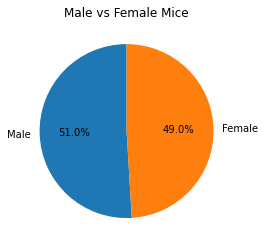

In [64]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count = combined_data['Sex'].value_counts()

pie_plot = gender_count.plot(kind='pie', title='Male vs Female Mice', startangle=90, autopct='%1.1f%%')
pie_plot = pie_plot.set_ylabel('')

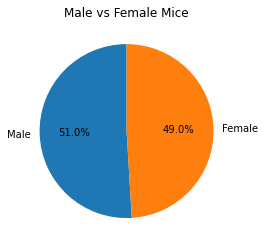

In [65]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_plot = plt.pie(gender_count, labels=gender_count.index, startangle=90, autopct='%1.1f%%')
pie_plot = plt.title('Male vs Female Mice')

## Quartiles, Outliers and Boxplots

In [84]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = pd.DataFrame(combined_data.groupby('Mouse ID')['Timepoint'].max())
max_timepoint = max_timepoint.rename(columns={'Timepoint': 'Max_Timepoint'})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(combined_data, max_timepoint, on='Mouse ID')
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate,Max_Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,False,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,False,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,False,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,False,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,False,45


In [94]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_list_df = merged_df.loc[merged_df['Drug Regimen'] == treatment]
    
    # Add subset 
    subset_df = treatment_list_df.loc[treatment_list_df['Timepoint'] == treatment_list_df['Max_Timepoint']]
    
    # Add tumor volumes to empty list
    tumor_vol_values = subset_df['Tumor Volume (mm3)']
    tumor_vol.append(tumor_vol_values)

    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol_values.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq

    # Determine upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Count outliers for each treatment
    outlier_count = tumor_vol_values.loc[(subset_df['Tumor Volume (mm3)'] < lower_bound) | (subset_df['Tumor Volume (mm3)'] > upper_bound)].count()
    print(f'The number of potential outliers for {treatment} is: {outlier_count}')

The number of potential outliers for Capomulin is: 0
The number of potential outliers for Ramicane is: 0
The number of potential outliers for Infubinol is: 1
The number of potential outliers for Ceftamin is: 0


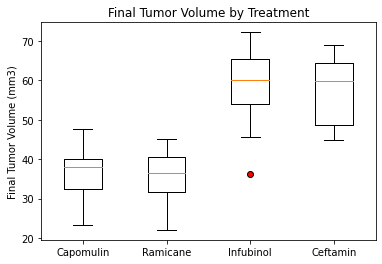

In [109]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(markerfacecolor='r')
box_plot = plt.boxplot(tumor_vol, flierprops=flierprops)
box_plot = plt.title('Final Tumor Volume by Treatment')
box_plot = plt.ylabel('Final Tumor Volume (mm3)')
box_plot = plt.xticks([1,2,3,4],['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

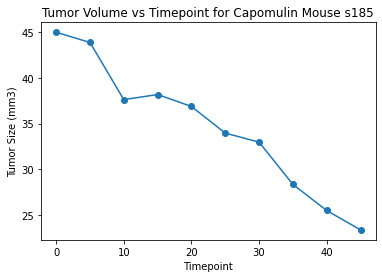

In [126]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
single_mouse_capomulin = combined_data.loc[combined_data['Mouse ID'] == 's185']

plt.plot(single_mouse_capomulin['Timepoint'], single_mouse_capomulin['Tumor Volume (mm3)'], marker='o')
plt.title('Tumor Volume vs Timepoint for Capomulin Mouse s185'), plt.xlabel('Timepoint'), plt.ylabel('Tumor Size (mm3)')
plt.show()

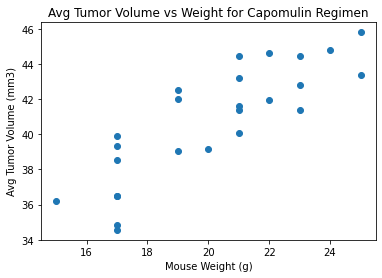

In [164]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_data = combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin']

# Calculate avg tumor volume for each mouse id under capomulin regimen
avg_tumor_volume = pd.DataFrame(capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean())
avg_tumor_volume = avg_tumor_volume.rename(columns={'Tumor Volume (mm3)': 'Avg Tumor Volume (mm3)'})

# Merge with capomulin data
merged_df = pd.merge(capomulin_data, avg_tumor_volume, on='Mouse ID')
merged_df = merged_df[['Weight (g)', 'Avg Tumor Volume (mm3)']].drop_duplicates()

# Create scatter plot
plt.scatter(merged_df['Weight (g)'], merged_df['Avg Tumor Volume (mm3)'])
plt.title('Avg Tumor Volume vs Weight for Capomulin Regimen'), plt.xlabel('Mouse Weight (g)'), plt.ylabel('Avg Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between Weight (g) and Avg Tumor Volume (mm3) for the Capomulin regimen is: 0.84


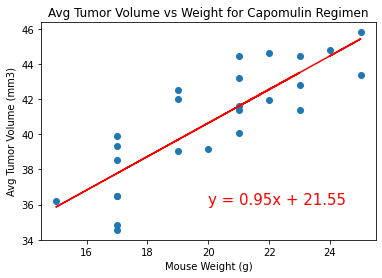

In [192]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(merged_df['Weight (g)'],merged_df['Avg Tumor Volume (mm3)'])
print(f"The correlation between Weight (g) and Avg Tumor Volume (mm3) for the Capomulin regimen is: {round(correlation[0],2)}")

# Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(merged_df['Weight (g)'], merged_df['Avg Tumor Volume (mm3)'])
regress_values = merged_df['Weight (g)'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear regression over the scatter plot
plt.scatter(merged_df['Weight (g)'], merged_df['Avg Tumor Volume (mm3)'])
plt.plot(merged_df['Weight (g)'], regress_values, color='r')
plt.annotate(line_eq, (20,36), fontsize=15, color='r')
plt.title('Avg Tumor Volume vs Weight for Capomulin Regimen'), plt.xlabel('Mouse Weight (g)'), plt.ylabel('Avg Tumor Volume (mm3)')
plt.show()